In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
columns = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class_labels']
df = pd.read_csv('iris.data', names = columns)




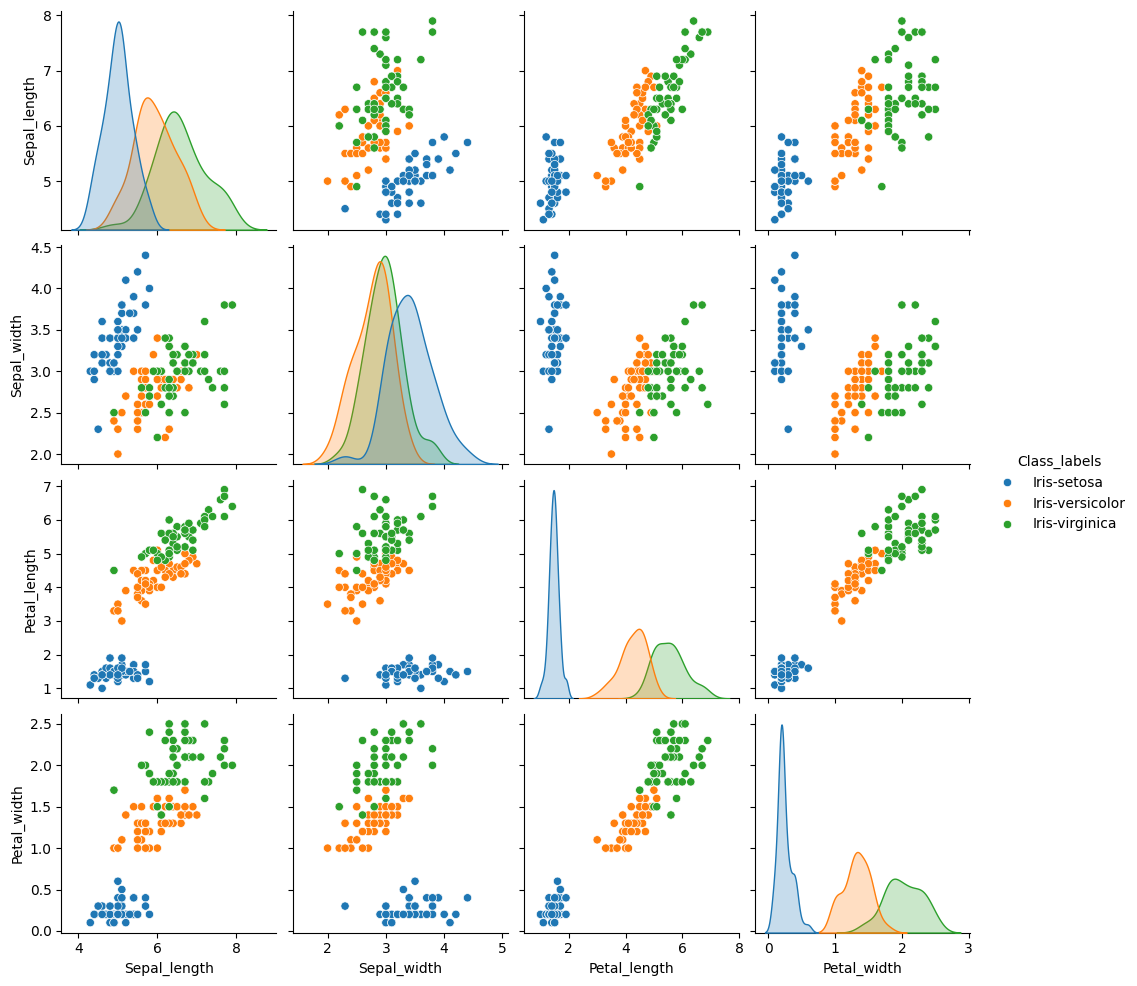

In [9]:
sns.pairplot(df, hue='Class_labels')

In [11]:
data = df.values

In [13]:
X = data[:, 0:4]
Y = data[:, 4]

In [14]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])

Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)

X_axis = np.arange(len(columns)-1)
width = 0.25

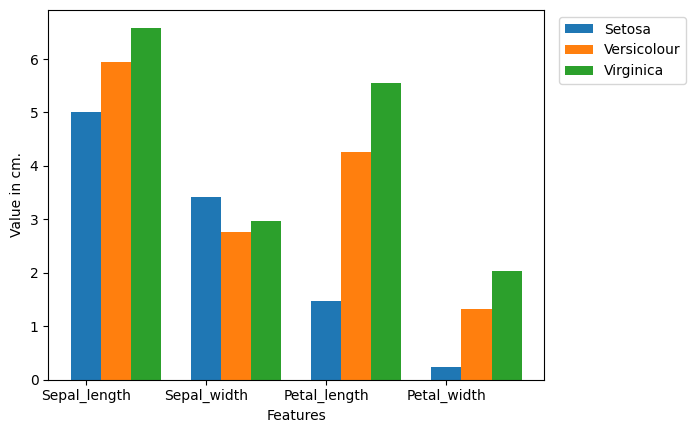

In [17]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

In [28]:
from sklearn.svm import SVC

svn = SVC()
svn.fit(Xtrain, Ytrain)

SVC()

In [29]:
predicted = svn.predict(Xtest)

from sklearn.metrics import accuracy_score

accur = accuracy_score(Ytest, predicted)
print(accur)

0.9666666666666667


In [31]:
from sklearn.metrics import classification_report

print(classification_report(Ytest, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))